In [1]:
import pandas as pd
import numpy as np
import matplotlib
import time  # for benchmarking

In [2]:
# define convergent sequence function of n here:
def a_n(n):
    # limit must be 0, though i suppose i can generalize it by having you input the limit (you'd have to already know it)
    return np.sin(n)  # just an example

In [3]:
def sigma(n):
    if n == 1:
        output = 1
        while a_n(output) <= 0:
            output += 1
        return output
    prev = sigma(n - 1)
    output = prev + 1  # no repeating of the same index
    while not a_n(prev) > a_n(output) > 0:
        output += 1
    return output

In [4]:
def calculate_n_sigma_values(n):
    if n == 1:
        value = 1
        while a_n(value) <= 0:
            value += 1
        return [value]
    arr = calculate_n_sigma_values(n - 1)
    prev = arr[-1]
    value = prev + 1
    while not a_n(prev) > a_n(value) > 0:
        if n > 17:
            print(value)
        value += 1
    arr.append(value)
    print("sigma of", n, "value of sin", np.sin(value))
    return arr

sigma of 2 value of sin 0.1411200080598672
sigma of 3 value of sin 0.017701925105413577
sigma of 4 value of sin 0.01767178546737087
sigma of 5 value of sin 0.00888145245887885
sigma of 6 value of sin 0.008791022929352243
sigma of 7 value of sin 6.0288706691585265e-05
sigma of 8 value of sin 4.9273689123705576e-05
sigma of 9 value of sin 4.115937093689572e-05
sigma of 10 value of sin 8.114318195038078e-06
sigma of 11 value of sin 2.900699389332111e-06
sigma of 12 value of sin 2.3129194164527015e-06
sigma of 13 value of sin 1.1755599457625595e-06
sigma of 14 value of sin 1.1373594706916884e-06


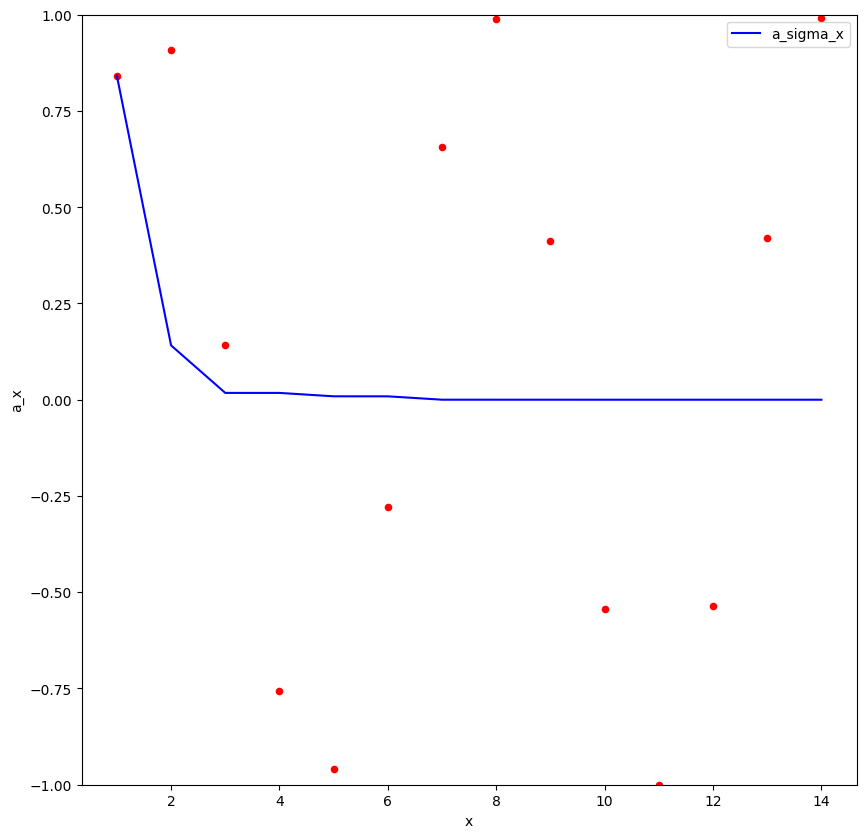

In [5]:
def generate_graph_value_dict(n):
    return {
        "x": [i for i in range(1, n + 1)],
        "a_x": [a_n(i) for i in range(1, n + 1)],
        "a_sigma_x": [a_n(sigma_x) for sigma_x in calculate_n_sigma_values(n)],
    }


def graph_results(graph_value_dict):
    graph_value_df = pd.DataFrame(graph_value_dict)
    plot = graph_value_df.plot(
        kind="scatter", x="x", y="a_x", color="red", figsize=(10, 10), ylim=(-1, 1)
    )
    graph_value_df.plot(
        kind="line", x="x", y="a_sigma_x", ax=plot, color="blue", figsize=(10, 10)
    )


# finds and graphs 14 terms of the initial series, and 14 terms of the monotonically decreasing subsequence
graph_value_dict = generate_graph_value_dict(14)
graph_results(graph_value_dict)